In [211]:
import matplotlib.pyplot as plt 
import random
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [212]:
print(X[64] , y[64])


[0.67604511 0.0642074 ] 1


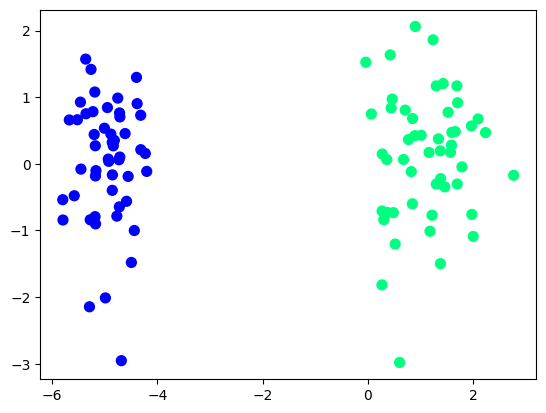

In [213]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=50) 

In [214]:
w = np.ones((X.shape[1],1))
w.shape

(2, 1)

In [215]:
def step(z):
    return 1 if z > 0 else 0

def perceptron(X, y, epochs=1000, learn_rate=0.01):
    X = np.hstack([np.ones((X.shape[0], 1)), X])  
    m, n = X.shape
    w = np.ones((n, 1))
    y = y.reshape(-1, 1)

    for i in range(epochs):
        rand_x = random.randint(0, m - 1)
        x_i = X[rand_x].reshape(1, -1)     
        y_hat = step(np.dot(x_i, w))      
        error = y[rand_x][0] - y_hat       

        w += learn_rate * error * x_i.T

    return w[0],w[1:]



In [216]:
intercept_,coef_ = perceptron(X,y)

In [217]:
print(coef_)
print(intercept_)

[[1.07085308]
 [0.62924199]]
[1.14]


In [218]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [219]:
print(m)
print(b)

[-1.70181439]
[-1.81170363]


(-3.0, 2.0)

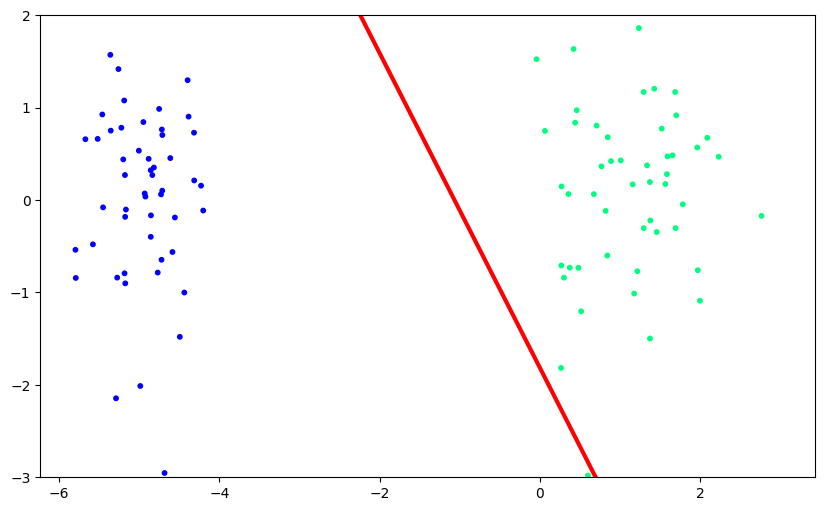

In [220]:
x_input = np.linspace(-3,3,100)
y_input_1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input_1,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=10)
plt.ylim(-3,2)

In [221]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)

C:\Users\USMAN-PC\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

(-3.0, 2.0)

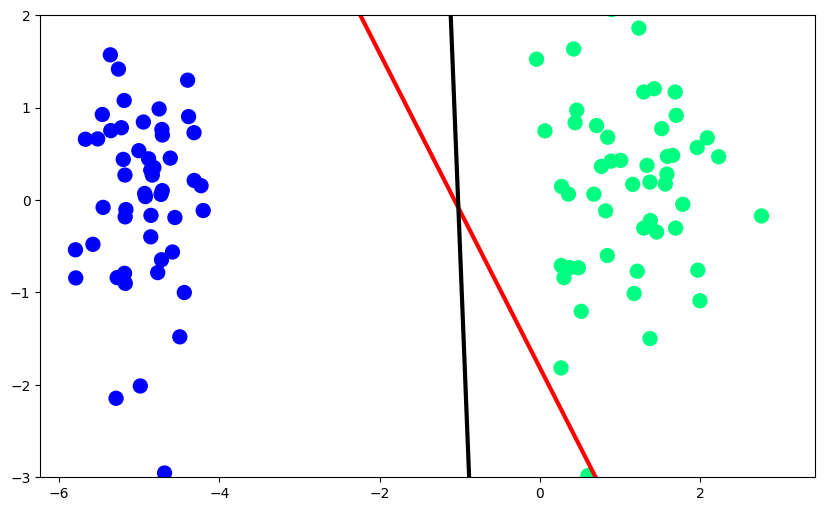

In [222]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input_1,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<h1>SIGMOID FUNCTION</h1>

In [223]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def perceptron(X, y, epochs=1000, learn_rate=0.01): 
    X = np.hstack([np.ones((X.shape[0], 1)), X])  
    m, n = X.shape  
    w = np.ones((n, 1))
    y = y.reshape(-1, 1) 
    rand_x = 1

    for i in range(epochs):
        rand_x = rand_x % m
        x_i = X[rand_x].reshape(1, -1)     
        y_hat = sigmoid(np.dot(x_i, w))      
        error = y[rand_x][0] - y_hat       

        w += learn_rate * error * x_i.T
        rand_x += 1

    return w[0],w[1:]

In [224]:
intercept_,coef_ = perceptron(X,y)

In [225]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

(-3.0, 2.0)

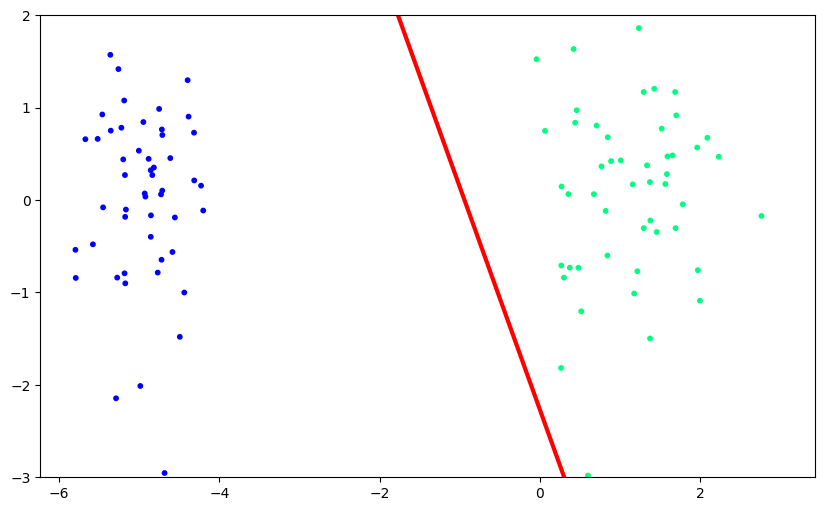

In [226]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=10)
plt.ylim(-3,2)

(-3.0, 2.0)

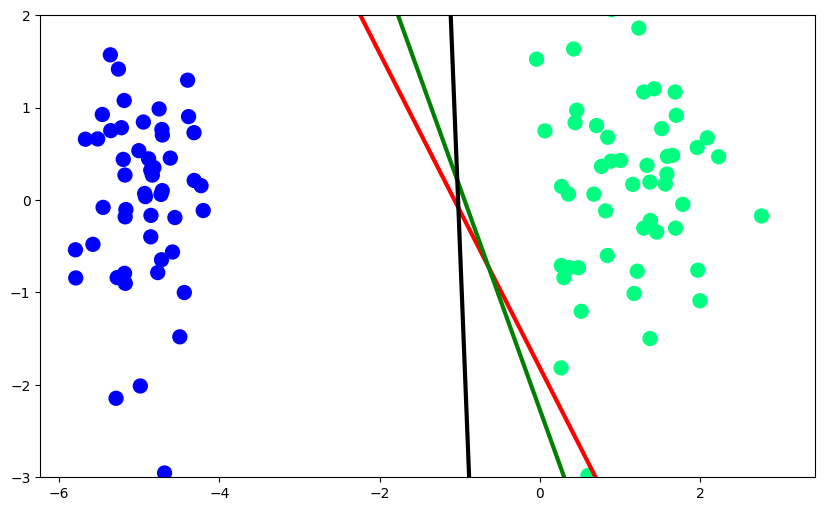

In [227]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input_1,color='red',linewidth=3)
plt.plot(x_input,y_input,color='green',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<h1>GRADIENT DESCEND</h1>

In [228]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(1000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[0],weights[1:]


In [229]:
intercept_,coef_ = gd(X,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

(-3.0, 2.0)

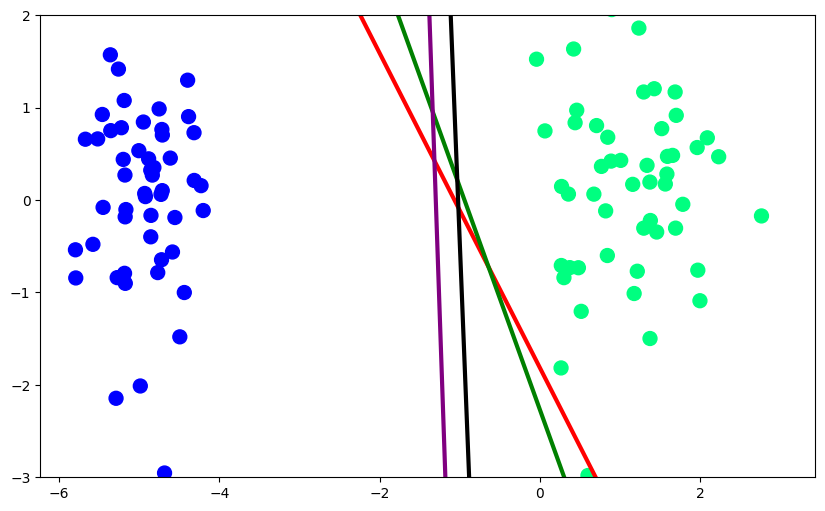

In [230]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input_1,color='red',linewidth=3)
plt.plot(x_input,y_input,color='green',linewidth=3)
plt.plot(x_input,y_input2,color='purple',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)